In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from sklearn.linear_model import LinearRegression

In [9]:
data = pd.read_csv("../../../data/1.01. Simple linear regression.csv")
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


## SATスコアからGPAを予測
### 単一の特徴量SATからGPAを予測するモデルを作成する

## 従属変数(GPA 出力、ターゲット)の独立変数(SAT ミュウ力、特徴量)を定義

In [10]:
x = data["SAT"]
y = data["GPA"]

In [16]:
x.shape

(84,)

In [17]:
y.shape

(84,)

データを一次元から二次元に変換

In [23]:
x_matrix = x.values.reshape(-1, 1)
x_matrix.shape

(84, 1)

Regression itself

In [26]:
reg = LinearRegression()

In [28]:
# モデルにデータをフィットさせる
reg.fit(x_matrix, y)

LinearRegression()

R-squared(決定係数)

In [29]:
reg.score(x_matrix, y)

0.40600391479679754

係数

In [30]:
reg.coef_

array([0.00165569])

切片 (intercept)

In [31]:
reg.intercept_

0.2750402996602799

予測

In [44]:
reg.predict([[1740]])

array([3.15593751])

In [63]:
new_data = pd.DataFrame(data=[1740, 1760], columns=["SAT"])
new_data

,SAT
0,1740
1,1760


In [64]:
reg.predict(new_data)

/Users/k21116kk/src/data-science/.venv/lib/python3.12/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([3.15593751, 3.18905127])

In [65]:
new_data["Predicted_GPA"] = reg.predict(new_data)
new_data

/Users/k21116kk/src/data-science/.venv/lib/python3.12/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


,SAT,Predicted_GPA
0,1740,3.155938
1,1760,3.189051


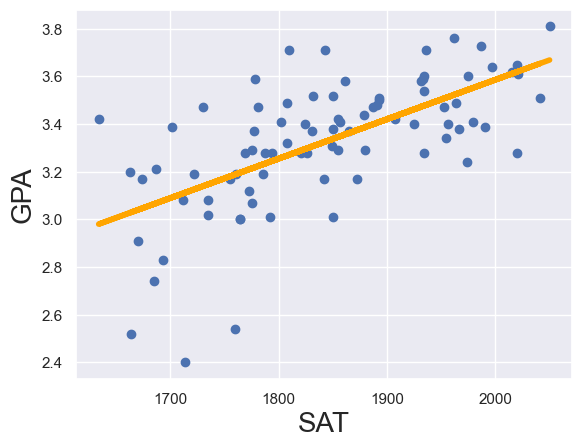

In [66]:
plt.scatter(x, y)
yhat = reg.coef_ * x_matrix + reg.intercept_
fig = plt.plot(x, yhat, lw=4, c="orange", label="regression line")
plt.xlabel("SAT", fontsize=20)
plt.ylabel("GPA", fontsize=20)
plt.show()